
<a name="T_38F77E06"></a>

# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>
<a name="beginToc"></a>

## Table of Contents
[Семинар 13. Метод Ньютона и Гаусса\-Ньютона](#H_BEC166BE)

&emsp;&emsp;[Условия второго порядка](#H_5D7876F2)

&emsp;[Итерационная оптимизация](#H_01A735E8)

&emsp;&emsp;[Направление убывания:](#H_0077EB5C)

&emsp;[Методы второго порядка для задачи наименьших квадратов](#H_743092B2)

&emsp;[Пример. Задача линейной регрессии](#H_A1F76E3E)

&emsp;&emsp;[Шаг метода Гаусса\-Ньютона  \- решение подзадачи линейной регресии](#H_8E15E3A3)

<a name="endToc"></a>
<a name="H_BEC166BE"></a>

## Семинар 13. Метод Ньютона и Гаусса\-Ньютона

Школьная формула Тейлора для скалярной функции скалярного аргумента:


$$f(x+p)=f(x)+\frac{df}{dx}(x)p+\frac{1}{2}\frac{d^2 f}{dx^2 }(x)p^2 +...$$

Функция предполагается бесконечно дифференцируемой


Формулы Тейлора для разложения скалярной функции векторного аргумента $f(\vec{x} )$ в окрестности точки $\vec{x}$ :


 $f(\vec{x} +\vec{p} )=f(\vec{x} )+\nabla f(\vec{x} +t\vec{p} )\cdot \vec{p}$ где $t\in (0,1)$ , если функция дифференцируема


 $f(\vec{x} +\vec{p} )=f(\vec{x} )+\nabla f(\vec{x} )\cdot \vec{p} +\frac{1}{2}\vec{p} \cdot \nabla^2 f(x+t\vec{p} )\cdot \vec{p}$ где $t\in (0,1)$ , если функция дважды дифференцируема


Необходимое (но не достаточное) условие локального минимума:


 $\nabla f({\vec{x} }^* )=\vec{0}$ \- равенство градиента нулю

<a name="H_5D7876F2"></a>

#### Условия второго порядка

Рассмотрим поведение квадратичной формы (скалярная функция векторного аргумента):


 $F(\vec{x} )={\vec{g} }^T \vec{x} +{\vec{x} }^T A\vec{x}$ , где $A$ \- некоторая матрица произвольная


Когда $F(\vec{x} )>0$ для любого $\vec{x}$ матрица называется $A$ положительно\-определенной.


In [1]:
cd(get_folder())
clearvars
a11 = 1.03;
a12 = -2.3;
a21 = -2.6;
a22 = 0.65;
b1 = -0.98;
b2 = -7.41;
A = [a11,a12;a21,a22];
b = [b1;b2];
make_positive=true;
if make_positive
    A = A'*A % эта операция делает матрицу положительно определенной
end

A = 2x2    
    7.8209   -4.0590
   -4.0590    5.7125

In [2]:
is_positive = make_positive;
% проверка на то, является ли матрица А положительно определенной, зачем?
if ~make_positive
    if isequal(A',A) % проверка является ли матрица симметричной
        check_A=A;
    else % матрица не симметрична
        check_A = (A' + A)/2;
    end
    try chol(check_A) % пробуем разложение холецкого (если матрица не ПО то ошибка)
         disp('Матрица А положительно определенная')
    catch ME
         disp('Матрица А не положительно определенная')
    end
end
f = @(x)b'*x(:) + transpose(x(:))*A*x(:); % функция - квадратичная форма
df = @(x) num_grad_dual(f,x); % функция численного расчета градиента (возвращает вектор)
df_abs = @(x) norm(df(x));% функция расчета модуля градиента
%d2f = @(x) num_hess_dual(df,x)
%d2f([1,2])


ax = get_next_ax();

fig1

In [3]:
fsurf(@(x,y) f([x;y]),[-1,1]) % функции fsurf и fcontour строят поверхность и контур

In [4]:
% функции, которая принимает два скалярных аргумента
hold(ax,"on")
fcontour(ax,@(x,y) f([x;y]),[-1,1])


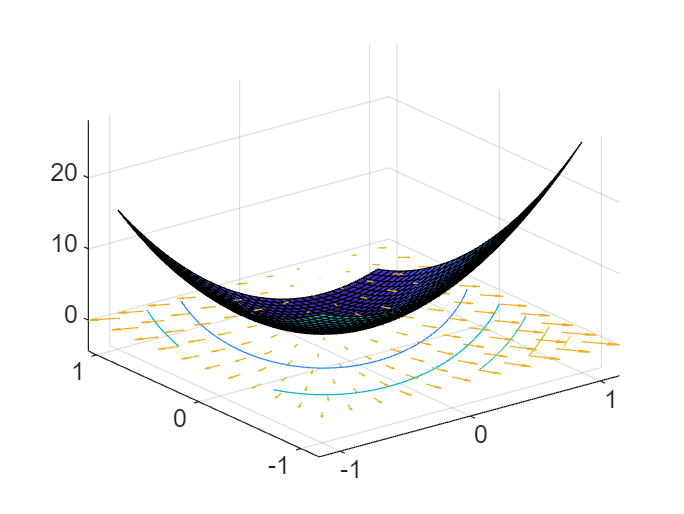

In [5]:
hold(ax,"off")

% теперь построим градиент
spacing = 0.2;
[X,Y] = meshgrid(-1:spacing:1,-1:spacing:1);
U = X;V=X;F_value=X;G_module = X;
U2 = X;V2=X;
for ii =1:size(X,1)
    for jj=1:size(Y,2)
        x = X(ii,jj);y = Y(ii,jj);
        G_value = df([x;y]);
        %H_value = d2f([x;y]); % hessian matrix
        NEWTON_STEP = -A\G_value;
        F_value(ii,jj) = f([x;y]);
        G_module(ii,jj) = sqrt(G_value'*G_value);
        U(ii,jj) = G_value(1);
        V(ii,jj) = G_value(2);
        U2(ii,jj) = NEWTON_STEP(1);
        V2(ii,jj) = NEWTON_STEP(2);
    end
end
hold(ax,"on")
q = quiver(ax,X,Y,U,V);
hold(ax,"off")

In [6]:
% тоже самое, только на плоскости
ax = get_next_ax();

fig2


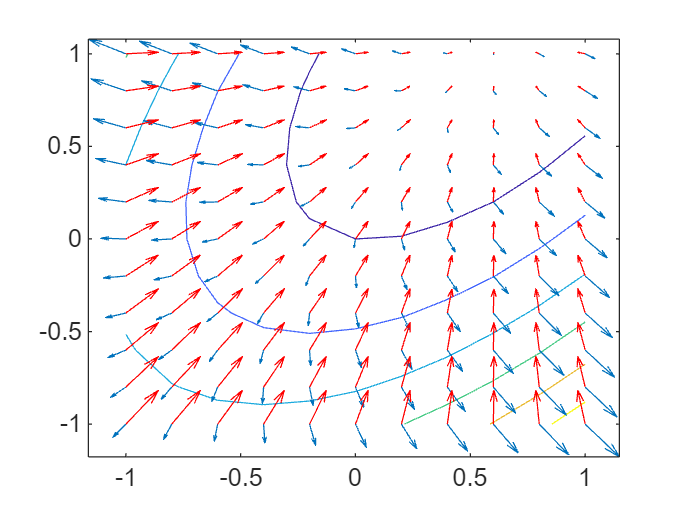

In [7]:
contour(ax,X,Y,F_value);
hold(ax,"on")
quiver(ax,X,Y,U,V)
quiver(ax,X,Y,U2,V2,'r')
hold(ax,"off")


Положительно определенной называется матрица $A$ для которой:


 ${\vec{x} }^T A\vec{x} >0$ для любого вектора $\vec{x}$ , как определить является ли матрица положительно определенной:


Например, симметричная положительно определенная матрица имеет положительные собственные значения.


Симметричная положительно определенная матрица может быть разложена в разложение Холецкого:


 $A=R^T R$ , где $R$ \- верхняя треугольная матрица.


 $det(A)>0$ ( $A=QR=>det(A)=det(R)=\sum_i R_{ii}$

<a name="H_01A735E8"></a>

### Итерационная оптимизация

Посмотрим еще раз на формулу Тейлора второго порядка с точки зрения применимости для вычисления шага метода оптимизации


 $f({\vec{x} }_k +\vec{p} )=f({\vec{x} }_k )+\nabla f({\vec{x} }_k )\cdot \vec{p} +\frac{1}{2}\vec{p} \cdot \nabla^2 f({\vec{x} }_k +t\vec{p} )\cdot \vec{p}$ где $t\in (0,1)$


Стратегия **line\-search**:


 $\vec{p} =-\alpha \frac{\nabla f}{||\nabla f||}$ \- величина шага подбирается


Теперь предположим, что t выражении выше равно нулю, то есть функция полностью описывается разложением второго порядка в некоторой области, это стратегия **trust\-region** :


$$f({\vec{x} }_k +\vec{p} )=f({\vec{x} }_k )+\nabla f({\vec{x} }_k )\cdot \vec{p} +\frac{1}{2}\vec{p} \cdot \nabla^2 f({\vec{x} }_k +t\vec{p} )\cdot \vec{p} \equiv m_k (\vec{x} +\vec{p} )$$

Перепишем ее, чтобы не путаться:


$$m_k (\vec{p} )=m_0 +{\vec{g} }_k^T \vec{p} +\frac{1}{2}{\vec{p} }^T B_k \vec{p}$$

 ${\vec{g} }_k$ и $B_k$ просто постоянные вектор и матрица, чтобы найти экстремум надо приравнять градиент к нулю:


 $\nabla_p m_k (\vec{p} )={\vec{g} }_k^T +B_k \vec{p} =0$ , это дает


$$\vec{p} =-B_k^{-1} \vec{g}$$

Например, если $B_k =\nabla^2 f({\vec{x} }_k )$ это называется шагом Ньютона, а метод оптимизации  \- Newton trust region.

<a name="H_0077EB5C"></a>

#### Направление убывания:

Антиградиент направлен в сторону убывания, но не только он, туда направлен любой вектор, который образует тупой угол с направлением градиента:


$$\vec{g} \cdot \vec{p} <0$$

Если $\vec{p} =-\alpha \frac{\vec{g} }{||\vec{g} ||}$ \- градиентный метод с линейным поиском:


 $-\alpha \frac{\vec{g} \cdot \vec{g} }{||\vec{g} ||}<0$ если скорость обучения положительна!


Если $\vec{p} =-B_k^{-1} \vec{g}$ \- метод второго порядка:


$$-\vec{g} \cdot B_k^{-1} \cdot \vec{g} <0$$

Если матрица $B_k$ положительно определенная, то и обратная будет положительно определенной, а это автоматически означает выполнение неравенства.


Таким образом, положительная определенность матрицы $B_k$ является необходимым условием того, чтобы алгоритм двигался в сторону уменьшения функции.

<a name="H_743092B2"></a>

### Методы второго порядка для задачи наименьших квадратов

Теперь посчитаем матрицу Гесса для конкретного типа функции невязки, а именно \- суммы квадратов


Задача метода наименьших квадратов, состоит в том, чтобы минимизировать квадрат модуля ошибки между результатами измерений и предсказанием модели:

<a name="M_A1E97831"></a>

$$\Phi (\vec{x} )=\frac{1}{2}\vec{r} \cdot \vec{r}$$

Квадрат модуля \- скалярное произведение вектора самого на себя, вектор ошибки  "живет" в пространстве с базисными векторами ${\hat{e} }_j$ , размерность этого пространства равна количеству экспериментальных точек. Вектор $\vec{x}$ \- это вектор параметров оптимизации, он "живет" в пространстве с базисными векторами ${\hat{x} }_i$ . Размерность этого пространства равна количеству переменных оптимизации.


Базисные вектора у нас взаимноортогональны и имеют единичную длину, то есть, их скалярное произведение:


 ${\hat{e} }_i \cdot {\hat{e} }_j$ равно нулю, если $i\not= j$ и единице, если $i=j$ , тоже самое и для векторов пространства ${\hat{x} }_i$ . Также мы считаем, что базисные вектора одинаковы в любой точке пространства и они не зависят от переменных оптимизации.


В соотвествии с [формулой](#M_27B507C0) для градиента:


$$\overleftrightarrow{J} =\nabla \vec{r} =\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j$$

Координаты этой диады \-  матрица Якоби.


Таким образом, матрица Якоби \- это матрица, в которой элемент, стоящий на ***i***\-й строке ***j*** \-го столбца \- это значение производной ***j***\-й координаты вектора ошибки по ***i***\-й переменной оптимизации:


$$J_{ij} =\frac{\partial r_j }{\partial x_i }$$

В частности, градиент скалярного  вектора самого на себя будет:


$$\nabla (\vec{r} \cdot \vec{r} )=2((\nabla \vec{r} )\cdot \vec{r} )$$

Тогда градиент квадратичной [невязки](#M_A1E97831):


$$\nabla \Phi (\vec{x} )=(\nabla \vec{r} )\cdot \vec{r}$$

Посчитаем вторую производную:


$$\nabla^2 \Phi (\vec{x} )=\nabla (\nabla \Phi (\vec{x} ))=\nabla ((\nabla \vec{r} )\cdot \vec{r} )$$

$$\nabla ((\nabla \vec{r} )\cdot \vec{r} )=\sum_k {\hat{x} }_k \frac{\partial }{\partial x_k }[\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j \cdot \sum_m r_m {\hat{e} }_m ]=\sum_k {\hat{x} }_k \frac{\partial }{\partial x_k }[\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i r_j ]=\sum_j \sum_k \sum_i {\hat{x} }_k {\hat{x} }_i \frac{\partial^2 r_j }{\partial x_k \partial x_i }r_j +[\sum_{i,k} {\hat{x} }_k {\hat{x} }_i \sum_j \frac{\partial r_j }{\partial x_i }\frac{\partial r_j }{\partial x_k }]$$

Таким образом, градиент \- это вектор, размер которого равен числу перемeнных оптимизации (**Px1**), матрица Якоби \- это матрица , размер которой равен (**PxN**)\*, а матрица Гесса \- это квадратная матрица (**PxP**).


Матрица вторых производных для квадратичной невязки состоит из двух слагаемых, первое \- это сумма N матриц размером PxP вторых производных каждой из координаты вектора ошибки :


$$H_2 =\sum_j h_j r_j$$

где $h_j =r_j [\begin{array}{ccccc} \frac{\partial^2 r_j }{\partial x_1 \partial x_1 } & \ldots & \frac{\partial^2 r_j }{\partial x_1 \partial x_k } & \ldots & \frac{\partial^2 r_j }{\partial x_1 \partial x_P }\newline \ldots & \ldots & \frac{\partial^2 r_j }{\partial x_k \partial x_i } & \ldots & \ldots\newline \frac{\partial^2 r_j }{\partial x_P \partial x_1 } & \ldots & \frac{\partial^2 r_j }{\partial x_P \partial x_k } & \ldots & \frac{\partial^2 r_j }{\partial x_P \partial x_P } \end{array}$ \]


Второе слагаемое  \- это перекрестные произведения первых производных:


$$H_a =JJ^T$$

В этом легко убедиться:


$$\overleftrightarrow{J} \cdot {\overleftrightarrow{J} }^T =\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j \cdot \sum_{k,m} {\hat{e} }_m {\hat{x} }_k \frac{\partial r_m }{\partial x_k }=\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j \cdot \sum_{k,m} {\hat{e} }_m {\hat{x} }_k \frac{\partial r_m }{\partial x_k }$$

$$\nabla^2 \Phi (\vec{x} )=\nabla (\nabla \Phi (\vec{x} ))=\nabla [(\nabla \vec{r} )\cdot \vec{r} ]=(\nabla \nabla \vec{r} )\cdot \vec{r} +(\nabla \vec{r} )\cdot (\vec{r} \nabla )$$

 $\nabla \nabla \vec{r} ={\hat{x} }_i {\hat{x} }_k \frac{\partial^2 r_j }{\partial x^i \partial x^k }{\hat{e} }^j$ \- тензор третьего ранга


$$(\nabla \nabla \vec{r} )\cdot \vec{r} ={\hat{x} }_i {\hat{x} }_j \frac{\partial^2 r_j }{\partial x^k \partial x^i }{\hat{e} }_j \cdot {\hat{e} }_k r^k ={\hat{x} }_i {\hat{x} }_j \frac{\partial^2 r_j }{\partial x^k \partial x^i }r^j$$

Если в формуле для матрицы Гесса ограничиться только первыми производными, то есть, положить:


$$\nabla^2 \Phi (\vec{x} )\simeq JJ^T$$

То мы получим метод Гаусса\-Ньютона, его достоинство в том, матрица $JJ^T$ всегда положительно определена (при условии, что она не сингулярна!), а это, как мы видели выше признак того, что шагая в данном направлении, мы будем двигаться в сторону убывания функции.


\*матрицу Якоби часто вводят в транспонированной форме относительно того как ввели мы, что удобнее с вычислительной точки зрения так как, как правило,  **P<<N,** а в основном языки column\-oriented.

<a name="H_A1F76E3E"></a>

### Пример. Задача линейной регрессии

Рассмотрим на конкретном примере \- задаче линейной регрессии.


$$\Phi (\vec{x} )=\frac{1}{2}\vec{r} \cdot \vec{r}$$

Вектор ошибки регрессии (раньше он обозначался $\vec{\epsilon}$ ):


$$\vec{r} =X\vec{b} -\vec{y}$$

Скалярная функция невязки для нее \- это, соотвественно, квадрат модуля вектора ошибки.


Функция невязки в матричной записи:


$$\Phi (\vec{b} )=\frac{1}{2}{\vec{r} }^T \vec{r} =||X\vec{b} -\vec{y} ||^2 =(X\vec{b} -\vec{y} )^T (X\vec{b} -\vec{y} )={\vec{y} }^T \vec{y} -2{\vec{y} }^T X\vec{b} +{\vec{b} }^T X^T X\vec{b}$$

Сравним  матрицу Якоби с [выражением](#M_191612CE) для матрицы предикторов линейной регрессии, видно, что: $J=X^T$


 $\nabla_b \Phi (\vec{b} )=\nabla_b \vec{r} \cdot \vec{r} =\overleftrightarrow{J} \cdot \vec{r}$                                                        (1)


В матричной форме это выражение имеет вид:


$$\nabla \Phi (\vec{b} )=X^T (X\vec{b} -\vec{y} )$$

 $\nabla^2 \Phi (\vec{b} )=JJ^T =X^T X$ \- гессиан состоит только из первых производных и он постоянный, то есть, не зависит от $\vec{b}$


 $\nabla^2 \Phi (\vec{b} )$ \- всегда положительно определенная и симметричная


Направления градиентного поиска на $k$ \-й итерации:


$${\vec{p} }_k =-\alpha X^T (X\vec{b_k } -\vec{y} )$$

Шаг метода ньютона:


$${\vec{p} }_k =-(X^T X)^{-1} X^T {\vec{r} }_k =-(X^T X)^{-1} X^T (X{\vec{b} }_k -\vec{y} )={\vec{b} }_k +(X^T X)^{-1} X^T \vec{y}$$
<a name="H_8E15E3A3"></a>

#### Шаг метода Гаусса\-Ньютона  \- решение подзадачи линейной регресии
<a name="H_DDAA7EC0"></a>

&nbsp;&nbsp;&nbsp;&nbsp; Это интересный момент, с одной стороны, мы видим, что для задачи линейной регресии шаг метода Ньютона совпадает с шагом метода Гаусса\-Ньютона (так как все вторые производные равны нулю), это дает нам нормальное уравнение, с другой стороны, мы видим, что метод Гаусса\-Ньютона (когда мы используем аппроксимацию Гессиана $H\simeq JJ^T$ ) по сути сводит  нелинейную задачу к решению задачи линейной регрессии для нахождения шага в окрестности текущей точки итерационной оптимизации, где роль матрицы предикторов играет транспонированная матрица Якоби, рассчитанная  в данной точке.  То есть, так как шаг метода Гаусса\-Ньютона дается выражением:


$${\vec{p} }_k =-(JJ^T )^{-1} J\vec{r} =-(J^T )^{\dagger} \vec{r}$$

Которое совпадает с решением задачи линейной оптимизации следующего вида:

<a name="M_8C4714FD"></a>

$$J^T {\vec{p} }_k =-\vec{r}$$

Причем, для решения данной подзадачи мы можем исопльзовать арсенал методов линейной оптимизации, например использовать QR\-факторизацию или SVD разложение, как мы это делали для линейной регресии, нам не нужно реально считать аппроксимацию матрицы Гесса, нам достаточно посчитать только матрицу Якоби и при помощи QR факториции решить [уравнение](#M_8C4714FD).


ДАЛЬШЕ ИДЕТ БЛОК ФУНКЦИЙ


In [8]:
function folder = get_folder()
% функция смотрит какой файл открыт в редакторе в настоящий момент и
% возвращает путь к данному файлу
    folder = fileparts(matlab.desktop.editor.getActiveFilename);
end

function [y,p] = persistent_func(f,dx)
% функция сдвигает фазу аргумента функции f на величину dx
    persistent x
    persistent animated_Line axes_handle; % при первом пуске persistent переменная []
    if isempty(x)
        x =-dx; % обнуляем сдвиг в начальный момент
    end
    if isempty(animated_Line)
        axes_handle = axes(figure(10),"XTickMode","manual","YTickMode","manual","XLim",[0,2*pi],"YLim",[-1 1]);
        animated_Line = animatedline(axes_handle,"Marker","o","LineStyle","none");
    end
    x=x+dx;
    y = f(x);
    addpoints(animated_Line,x,y);
    drawnow
end

function [new_ax,fig_handle] = get_next_ax(index)
% функция, которая возвращает новые оси на новой фигуре
    arguments
        index = []
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle);
        disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle);
    end
end